### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
# -- ВАШ КОД ТУТ

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [4]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [5]:
MSE = np.array([])
MSE

array([], dtype=float64)

In [6]:
for degree in range (1, 9):
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = Ridge(alpha=0.8).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    MSE_valid_ridge = mean_squared_error(y_valid, y_pred)
    MSE_train_ridge = mean_squared_error(y_train, y_pred_train)
    
    model = Lasso(alpha=0.8).fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    MSE_valid_lasso = mean_squared_error(y_valid, y_pred)
    MSE_train_lasso = mean_squared_error(y_train, y_pred_train)
    
    MSE = np.append(MSE, [MSE_valid_ridge, MSE_train_ridge, MSE_valid_lasso, MSE_train_lasso])
    # или так
    if degree == 1:
        MSE_ = np.array([MSE_valid_ridge, MSE_train_ridge, MSE_valid_lasso, MSE_train_lasso])
    else:  
        MSE_ = np.vstack ([MSE_, [MSE_valid_ridge, MSE_train_ridge, MSE_valid_lasso, MSE_train_lasso]])

C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9365323182556149, tolerance: 0.0024481555784964045
  positive)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6197582700047555, tolerance: 0.0024481555784964045
  positive)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3594230250602672, tolerance: 0.0024481555784964045
  positive)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.713

In [7]:
MSE_

array([[0.2691918 , 0.31775725, 0.64521718, 0.54223511],
       [0.2526163 , 0.31414958, 0.36471915, 0.35830066],
       [0.07051586, 0.10027094, 0.36471915, 0.35830066],
       [0.06353172, 0.10562556, 0.11181014, 0.16475111],
       [0.06757627, 0.081604  , 0.09387726, 0.15773098],
       [0.07055461, 0.08357012, 0.10238036, 0.16880441],
       [0.07128983, 0.06817542, 0.09884981, 0.16407832],
       [0.07852416, 0.07021038, 0.09284713, 0.15517204]])

In [8]:
MSE = MSE.reshape(8,4)
MSE

array([[0.2691918 , 0.31775725, 0.64521718, 0.54223511],
       [0.2526163 , 0.31414958, 0.36471915, 0.35830066],
       [0.07051586, 0.10027094, 0.36471915, 0.35830066],
       [0.06353172, 0.10562556, 0.11181014, 0.16475111],
       [0.06757627, 0.081604  , 0.09387726, 0.15773098],
       [0.07055461, 0.08357012, 0.10238036, 0.16880441],
       [0.07128983, 0.06817542, 0.09884981, 0.16407832],
       [0.07852416, 0.07021038, 0.09284713, 0.15517204]])

In [9]:
degree = np.linspace(1, 8, 8)
degree

array([1., 2., 3., 4., 5., 6., 7., 8.])

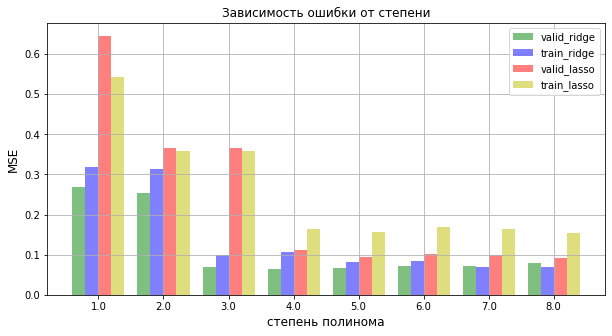

In [10]:
plt.figure(figsize=(10, 5)) 
plt.bar(degree, MSE[:,0], color = 'g', alpha = 0.5, width = 0.2, label = 'valid_ridge')
plt.bar(degree+0.2, MSE[:,1], color = 'b', alpha = 0.5, width = 0.2, label = 'train_ridge')
plt.bar(degree+0.4, MSE[:,2], color = 'r', alpha = 0.5, width = 0.2, label = 'valid_lasso')
plt.bar(degree+0.6, MSE[:,3], color = 'y', alpha = 0.5, width = 0.2, label = 'train_lasso')
plt.xticks(degree + 0.3, degree)
plt.xlabel('степень полинома', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Зависимость ошибки от степени', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [11]:
print ('при регуляризации Ridge оптимальной степенью полинома является %d, MSE_valid = %.3f \nпри \
регуляризации Lasso оптимальной степенью полинома является %d, MSE_valid = %.3f' \
       % (MSE[:,0].argmin() + 1, MSE[:,0].min(), MSE[:,2].argmin() + 1, MSE[:,2].min()))

при регуляризации Ridge оптимальной степенью полинома является 4, MSE_valid = 0.064 
при регуляризации Lasso оптимальной степенью полинома является 8, MSE_valid = 0.093


Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!